<a href="https://colab.research.google.com/github/OmniaMohammed99/projects/blob/master/sentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Getting & Reading the Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

In [2]:
train_data = pd.read_csv('/content/train.csv (1).zip', encoding='latin-1')
train_data.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [3]:
train_data.shape

(27481, 10)

In [4]:
train_data.isnull().sum()

,0
textID,0
text,1
selected_text,1
sentiment,0
Time of Tweet,0
Age of User,0
Country,0
Population -2020,0
Land Area (Km²),0
Density (P/Km²),0


In [6]:
train_data.dropna(inplace=True)

In [5]:
test_data = pd.read_csv('/content/test (1).csv', encoding='latin-1')
test_data.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [7]:
train_data['sentiment'].value_counts()

,count
sentiment,
neutral,11117
positive,8582
negative,7781


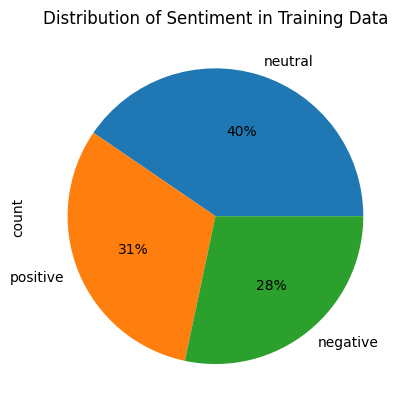

In [8]:

train_data['sentiment'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.title('Distribution of Sentiment in Training Data')
plt.show()

In [9]:
test_data.shape

(4815, 9)

In [10]:
test_data.isnull().sum()

,0
textID,1281
text,1281
sentiment,1281
Time of Tweet,1281
Age of User,1281
Country,1281
Population -2020,1281
Land Area (Km²),1281
Density (P/Km²),1281


In [11]:
#making sure that 'text' is string to avoid errors with Nan (float)
train_data['text']=train_data['text'].astype(str)
test_data['text']=test_data['text'].astype(str)

In [12]:
train_data['text']

,text
0,"I`d have responded, if I were going"
1,Sooo SAD I will miss you here in San Diego!!!
2,my boss is bullying me...
3,what interview! leave me alone
4,"Sons of ****, why couldn`t they put them on t..."
...,...
27476,wish we could come see u on Denver husband l...
27477,I`ve wondered about rake to. The client has ...
27478,Yay good for both of you. Enjoy the break - y...
27479,But it was worth it ****.


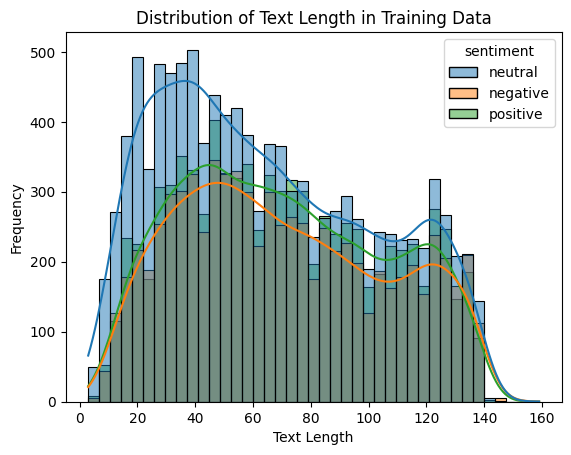

In [13]:
#exploring the length of the text
sns.histplot(train_data ,x = train_data['text'].apply(len), hue = 'sentiment', kde = True )
plt.title('Distribution of Text Length in Training Data')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

#Data preprocessing and cleaning

In [14]:
train_data.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [15]:
train_data.columns

Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)'],
      dtype='object')

In [16]:
train_data.drop(columns=['textID'],inplace=True)
train_data.head()

,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [24]:
#NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
#nltk resourses
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
#text cleaning in the training data
import string

def clean_text(text):

   if pd.isna(text):
      return ''


    # Convert to lowercase
   text = text.lower()

    #remove HTML tags
   text = re.sub(r'<.*?>','',text)

    #remove hashtags
   text = re.sub(r'#\w+', '', text)

    #remove user mentions
   text = re.sub(r'@\w+', '', text)

    #remove URLs
   text = re.sub(r'http\S+|www\.\S+','',text)

    #remove punctuation
   text = text.translate(str.maketrans('', '', string.punctuation))

    #remove numbers
   text = re.sub(r'\d+', '', text)

    #remove whitespace
   text = text.strip()

   return text


#preprocess the text
def preprocess_text(text):

    if pd.isna(text):
        return ''


    #clean text
    text = clean_text(text)

    #tokenization
    tokens = word_tokenize(text)

    #remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    #lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    #join tokens back into text
    processed_text = ' '.join(tokens)

    return processed_text

In [21]:
test_data.drop(columns=['textID'],inplace=True)
test_data.head()

,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [27]:
#applying the function above on the text we have
print('processing the training data:')
train_data['processed_text'] = train_data['text'].apply(preprocess_text)
print('\n processing the test data:')
test_data['processed_text'] = test_data['text'].apply(preprocess_text)

# Display examples of original vs processed text
print('\nOriginal vs Processed Text Examples:')
for i in range(4):
    print(f'Original: {train_data.iloc[i]["text"]}')
    print(f'Processed: {train_data.iloc[i]["processed_text"]}')
    print("---")


processing the training data:

 processing the test data:

Original vs Processed Text Examples:
Original:  I`d have responded, if I were going
Processed: id responded going
---
Original:  Sooo SAD I will miss you here in San Diego!!!
Processed: sooo sad miss san diego
---
Original: my boss is bullying me...
Processed: bos bullying
---
Original:  what interview! leave me alone
Processed: interview leave alone
---


In [28]:
#converting categorical values of ['sentiment'] to numerical values
mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
train_data['mapped_sentiment'] = train_data['sentiment'].map(mapping)
test_data['mapped_sentiment'] = test_data['sentiment'].map(mapping)

In [29]:
#drop the missing values in the test_data
new_test_set = test_data.dropna(subset =['text','sentiment'])

Splitting the Data

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
#split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_data['processed_text'], train_data['mapped_sentiment'], test_size=0.2, random_state=42, stratify=train_data['mapped_sentiment'])
#stratify for maintain the calss balance in both sets

print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])

Training set size: 21984
Validation set size: 5496


Modeling

In [37]:
#train different models
#create function to automate training, evaluation, visualization for each model

def train_evaluate_model(model_name, vectorizer, classifier, X_train, y_train, X_val, y_val):

   #create a pipeline
   pipeline = Pipeline([
       ('vectorizer', vectorizer),
       ('classifier', classifier)
   ])

   #train a model
   print(f'Training {model_name}...')
   pipeline.fit(X_train, y_train)

   #make predictions
   y_pred = pipeline.predict(X_val)

   #evaluate the model
   accuracy = accuracy_score(y_val, y_pred)
   print(f'{model_name} Accuracy: {accuracy:.4f}')

   #generate classification report
   print(f'\nClassification Report:')
   report = classification_report(y_val, y_pred)

    #generate confusion matrix
   conf_matrix = confusion_matrix(y_val, y_pred)
   print(f'\nConfusion Matrix:')
   plt.figure(figsize=(8, 6))
   sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
               xticklabels=['Negative', 'Neutral', 'Positive'],
               yticklabels=['Negative', 'Neutral', 'Positive'])
   plt.xlabel('Predicted')
   plt.ylabel('Actual')
   plt.title(f'Confusion Matrix - {model_name}')
   plt.show()


   return pipeline, accuracy
   return pipeline

In [38]:
# Define vectorizers
count_vectorizer = CountVectorizer(max_features=5000)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Define models to try
models = [
    ('Logistic Regression with Count Vectors', count_vectorizer, LogisticRegression(max_iter=1000, C=1.0)),
    ('Logistic Regression with TF-IDF', tfidf_vectorizer, LogisticRegression(max_iter=1000, C=1.0)),
    ('Naive Bayes with Count Vectors', count_vectorizer, MultinomialNB()),
    ('Naive Bayes with TF-IDF', tfidf_vectorizer, MultinomialNB()),
    ('Linear SVC with TF-IDF', tfidf_vectorizer, LinearSVC(max_iter=1000)),
    ('Random Forest with TF-IDF', tfidf_vectorizer, RandomForestClassifier(n_estimators=100))
]


Training Logistic Regression with Count Vectors...
Logistic Regression with Count Vectors Accuracy: 0.6827

Classification Report:

Confusion Matrix:


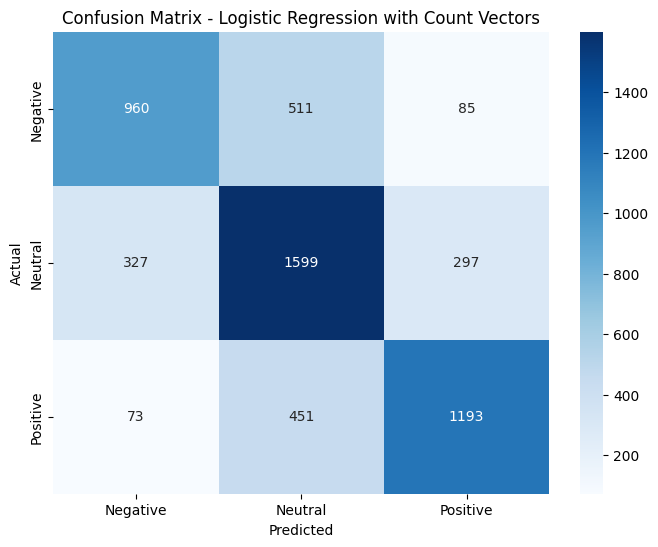

Training Logistic Regression with TF-IDF...
Logistic Regression with TF-IDF Accuracy: 0.6854

Classification Report:

Confusion Matrix:


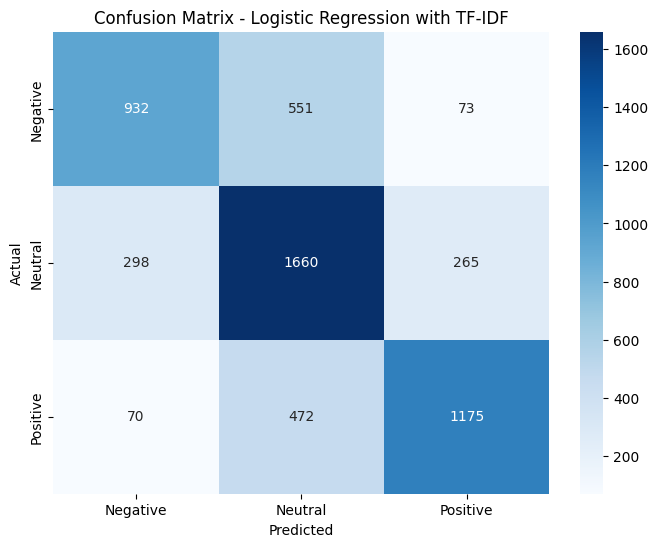

Training Naive Bayes with Count Vectors...
Naive Bayes with Count Vectors Accuracy: 0.6514

Classification Report:

Confusion Matrix:


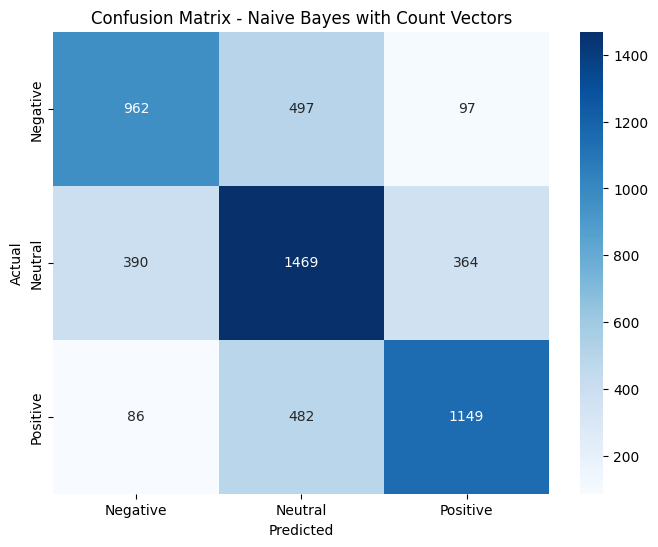

Training Naive Bayes with TF-IDF...
Naive Bayes with TF-IDF Accuracy: 0.6310

Classification Report:

Confusion Matrix:


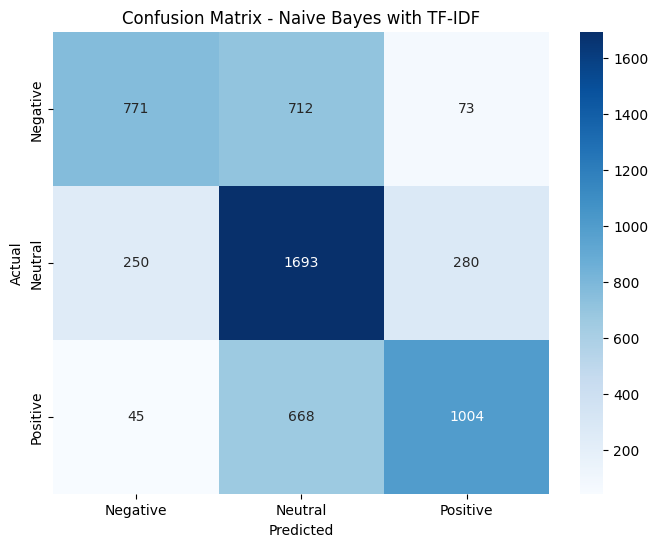

Training Linear SVC with TF-IDF...
Linear SVC with TF-IDF Accuracy: 0.6712

Classification Report:

Confusion Matrix:


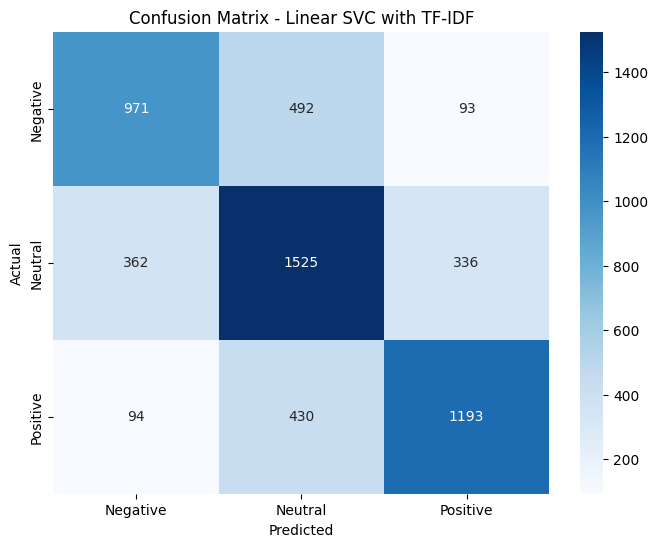

Training Random Forest with TF-IDF...
Random Forest with TF-IDF Accuracy: 0.6965

Classification Report:

Confusion Matrix:


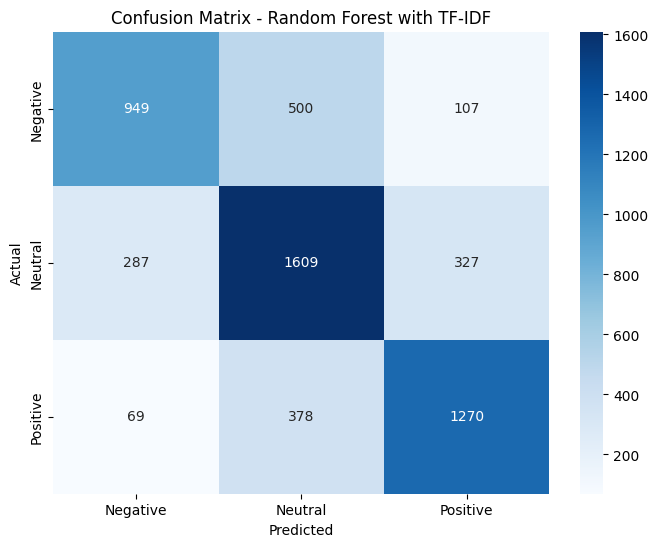

In [39]:
# Train and evaluate each model
results = {}
for model_name, vectorizer, classifier in models:
    pipeline, accuracy = train_evaluate_model(
        model_name, vectorizer, classifier, X_train, y_train, X_val, y_val
    )
    results[model_name] = (pipeline, accuracy)

In [40]:
#find the best model
best_model = max(results.keys(), key = lambda k: results[k][1])

best_pipeline, best_accuracy = results[best_model]
print(f'Best Model: {best_model}')
print(f'Best Accuracy: {best_accuracy:.4f}')


Best Model: Random Forest with TF-IDF
Best Accuracy: 0.6965


In [60]:
# After identifying the best model, let's dive deeper into its strengths and weaknesses.
# We'll look at per-class F1-scores and examine misclassified examples for further insights.

#get the best model pipeline
best_pipeline = results[best_model][0]

#make predictions on the validation set
y_val_pred = best_pipeline.predict(X_val)


def detailed_evaluation(y_true, y_pred, model_name):

    '''
   Perform detailed evaluation of model performance

    Args:
        y_true: True labels
        y_pred: Predicted labels
        model_name: Name of the model for reporting
    Returns:
        pd.DataFrame: Classification report as DataFrame'''
  #classification report(as dataframe)
    report = classification_report(y_true, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()

    print(f'detailed evaluation for {model_name}:')
    print(report_df)


    #visualize F1-score by class
    # Exclude 'accuracy', 'macro avg', 'weighted avg' from plot
    class_labels = ['0', '1', '2']  # Assuming 0=negative, 1=neutral, 2=positive

    sns.barplot(x=class_labels, y=report_df.loc[class_labels, 'f1-score'], palette='viridis')

    plt.title(f'F1 Scores by Class - {model_name}')
    plt.ylabel("F1 Score")
    plt.ylim(0, 1)
    plt.xlabel("Sentiment Class")
    plt.xticks([0, 1, 2], ['Negative (0)', 'Neutral (1)','Positive (2)'])
    plt.tight_layout()
    plt.show()


    return report_df

detailed evaluation for Random Forest with TF-IDF:
              precision    recall  f1-score      support
0              0.727203  0.609897  0.663404  1556.000000
1              0.646964  0.723797  0.683227  2223.000000
2              0.745305  0.739662  0.742473  1717.000000
accuracy       0.696507  0.696507  0.696507     0.696507
macro avg      0.706491  0.691119  0.696368  5496.000000
weighted avg   0.700404  0.696507  0.696124  5496.000000


/tmp/ipython-input-3067208574.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=report_df.loc[class_labels, 'f1-score'], palette='viridis')


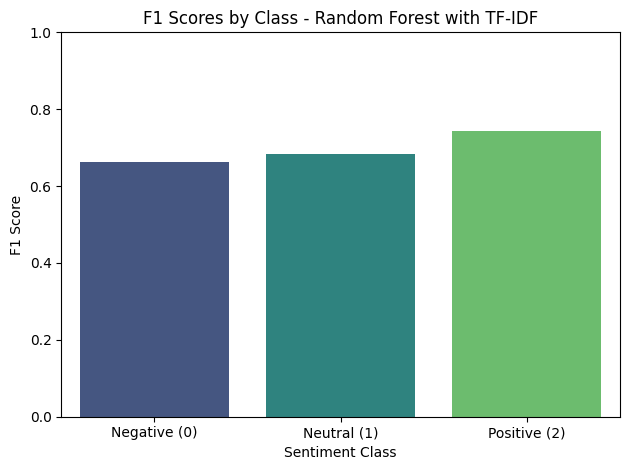

In [62]:
#Perform detailed evaluation
detailed_results = detailed_evaluation(y_val, y_val_pred, best_model)

In [63]:
# Find and analyze misclassified examples
misclassified_indices = np.where(y_val.values != y_val_pred)[0]
misclassified_examples = pd.DataFrame({
    'text': X_val.iloc[misclassified_indices].values,
    'true_sentiment': y_val.iloc[misclassified_indices].values,
    'predicted_sentiment': y_val_pred[misclassified_indices]
})

print("\nSample of misclassified examples:")
display(misclassified_examples.head(10))


Sample of misclassified examples:


,text,true_sentiment,predicted_sentiment
0,reading taking note undertanding none help,0,1
1,wow morning hr ding dong breakfastservice surp...,2,1
2,hoping heal anything put make worse owww,1,0
3,im sooo lovei think,2,1
4,shack idol today cant wait gon na funnn poor c...,1,0
5,awww hug wish could help,0,2
6,hour teleconference cant go back sleep got wor...,0,1
7,youtube isnt workingand wanted watch britain g...,0,1
8,dont know guy radio disney much energy wouldnt...,1,0
9,ahhhhh none friend want see dont wan na chill ...,0,1


Model saving

In [64]:
import pickle
#saving the model with a file
def save_model(model, filename):
    """
    Save a trained model to a file.

    Args:
        model: Trained model to save
        filename: Filename to save the model
    """
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved to {filename}")

# Save the best model
model_filename = 'sentiment_analysis_model.pkl'
save_model(best_pipeline, model_filename)


def load_model(filename):
    """
    Load a trained model from a file.

    Args:
        filename: Filename to load the model from

    Returns:
        Loaded model
    """
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

def predict_sentiment(text, model):
    """
    Predict sentiment for new text.

    Args:
        text (str): Input text
        model: Trained model

    Returns:
        int: Predicted sentiment (0=negative, 2=neutral, 4=positive)
    """
    # Preprocess the text using the same function as before
    processed_text = preprocess_text(text)
    # Make prediction
    return model.predict([processed_text])[0]

Model saved to sentiment_analysis_model.pkl


Upload the model and test it

In [66]:
loaded_model = load_model(model_filename)

test_texts = [
    "I absolutely love this product! It's amazing!",
    "The service was okay, nothing special.",
    "This is the worst experience I've ever had. Terrible customer service."
]

print("\nTesting model on new examples:")
for text in test_texts:
    sentiment = predict_sentiment(text, loaded_model)
    sentiment_label = {0: "Negative", 1: "Neutral", 2: "Positive"}.get(sentiment, "Unknown")
    print(f"Text: {text}")
    print(f"Predicted sentiment: {sentiment_label} ({sentiment})")
    print("---")


Testing model on new examples:
Text: I absolutely love this product! It's amazing!
Predicted sentiment: Positive (2)
---
Text: The service was okay, nothing special.
Predicted sentiment: Neutral (1)
---
Text: This is the worst experience I've ever had. Terrible customer service.
Predicted sentiment: Negative (0)
---
